## Twierdzenie Bayesa

\begin{align*}
P(A|B) = \frac{P(B|A)*P(A)}{P(B)}
\end{align*}

### W naszym przypadku mamy

\begin{align*}
P(klasa|cechy) = \frac{P(cechy|klasa)*P(klasa)}{P(cechy)}
\end{align*}

\begin{align*}
P(y|x) = \frac{P(x_{1}|y)* P(x_{2}|y)*P(x_{3}|y)* [...] *P(y)}{P(x)}
\end{align*}

### P(x|y) dla poszczegolnych wartosci

\begin{align*}
P(x_{i}|y) = \frac{1}{\sqrt{2  \pi  \sigma_{y}^{2} }} * exp ( - \frac{(x_{i} - \mu_{y})^{2}}{2\sigma_{y}^{2}} )
\end{align*}

\begin{align*}
\sigma^{2} = wariancja
\end{align*}

## Uproszczona wartość wykorzystana w algorytmie

\begin{align*}
Wartość-do-porównania = log(P(x_{1}|y))* log(P(x_{2}|y))*log(P(x_{3}|y))*[...] * log(P(y))
\end{align*}

In [4]:
import numpy as np
from sklearn import datasets
iris = datasets.load_iris()
x = iris.data[:, :2]
y = (iris.target != 0) * 1

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size=0.8)

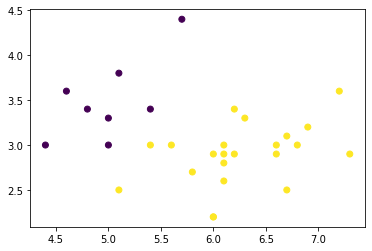

In [6]:
import matplotlib.pyplot as plt
plt.scatter(x_train[:,0],x_train[:,1], c = y_train)

x = x_train
y = y_train

In [7]:
liczba_probek, liczba_cech = x.shape
klasy = np.unique(y)
liczba_klas = len(klasy)

### Uczenie modelu

In [8]:
srednia = np.zeros((liczba_klas,liczba_cech))
wariancja = np.zeros((liczba_klas,liczba_cech))
priors =  np.zeros(liczba_klas)

for idx, c in enumerate(klasy):
    X_c = x[y==c]
    srednia[idx, :] = X_c.mean(axis=0)
    wariancja[idx, :] = X_c.var(axis=0)
    priors[idx] = X_c.shape[0] / float(liczba_probek)    #Mówi o tym, jak  często występuje dana klasa

### Definujmey funckję gęstości prawdopodobieństwa

\begin{align*}
P(x_{i}|y) = \frac{1}{\sqrt{2  \pi  \sigma_{y}^{2} }} * exp ( - \frac{(x_{i} - \mu_{y})^{2}}{2\sigma_{y}^{2}} )
\end{align*}

In [9]:
def gestosc_prawdopodobienstwa(class_idx, x, srednia, wariancja):  
    srednia = srednia[class_idx]
    wariancja = wariancja[class_idx]
    licznik = np.exp(- (x-srednia)**2 / (2 * wariancja))
    mianownik = np.sqrt(2 * np.pi * wariancja)
    return licznik / mianownik

### Obliczamy prawdopodobieństwo dla każdej klasy



\begin{align*}
Wartość-do-porównania = log(P(x_{1}|y)) + log(P(x_{2}|y)) + log(P(y))
\end{align*}

In [31]:
def predykcja(x):
    posteriors = []

    for idx, c in enumerate(klasy):
        prior = np.log(priors[idx])
        posterior = np.sum(np.log(gestosc_prawdopodobienstwa(idx, x, srednia, wariancja)))
        posterior = prior + posterior
        posteriors.append(posterior)


    return klasy[np.argmax(posteriors)]

In [32]:
y_predykcja = [predykcja(x) for x in x_test]

### Predykcja

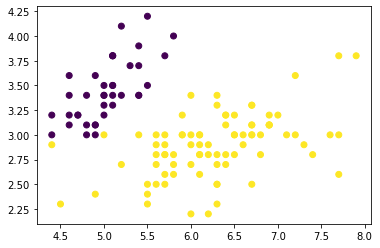

In [19]:
import matplotlib.pyplot as plt
plt.scatter(x_test[:,0],x_test[:,1], c = y_predykcja)

### Wartości prawdziwe

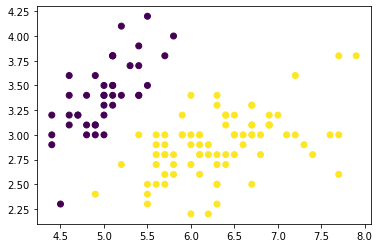

In [20]:
plt.scatter(x_test[:,0],x_test[:,1], c = y_test)